In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
plt.rcParams['figure.figsize'] = [8, 8]

In [3]:
doors_dict = {0:'goat', 1:'lambo'}

In [4]:
def three_doors_sim(n_trials, switch=False, new_contestant=False):
  wins = 0

  for _ in range(n_trials):
      doors = [0, 0, 1]
      np.random.shuffle(doors)

      # Player choice
      player_choice = np.random.randint(0, 2)

      # Door Revelation
      possible_reveals = [i for i in range(3) if i != player_choice and doors[i] == 0]
      revealed_door = np.random.choice(possible_reveals)

      remaining_doors = [i for i in range(3) if i != player_choice and i != revealed_door]
      if switch:
          player_choice = remaining_doors[0]

      if new_contestant:
          remaining_doors = [i for i in range(3) if i != revealed_door]
          player_choice = np.random.choice(remaining_doors)

      if doors[player_choice] == 1:
          wins += 1

  return wins / n_trials

Simulation of the player that switches

In [5]:
three_doors_sim(100000, switch=True)

0.6671

Simulation of the player that does not switch

In [6]:
three_doors_sim(100000, switch=False)

0.3338

Simulation of the newcomer

In [7]:
three_doors_sim(100000, switch=False, new_contestant=True)

0.50099

SIMULATION WITH N DOORS

In [8]:
def multiple_doors_sim(n_trials, N, M, switch=False, new_contestant=False):
  wins = 0

  for _ in range(n_trials):
      doors = np.zeros(N)
      doors[0] = 1
      np.random.shuffle(doors)

      # Player choice
      player_choice = np.random.randint(0, N)

      # Doors Revelation
      possible_reveals = [i for i in range(N) if i != player_choice and doors[i] == 0]
      revealed_doors = np.random.choice(possible_reveals, size=M, replace=False)

      remaining_doors = [i for i in range(N) if i != player_choice and i not in revealed_doors]
      if switch:
          player_choice = np.random.choice(remaining_doors)

      if new_contestant:
          remaining_doors = [i for i in range(N) if i not in revealed_doors]
          player_choice = np.random.choice(remaining_doors)

      if doors[player_choice] == 1:
          wins += 1

  return wins / n_trials

Some test with N=100

In [9]:
multiple_doors_sim(1000, 100, 98, switch=True)

0.994

In [10]:
multiple_doors_sim(1000, 100, 1, switch=True)

0.011

Text(0.5, 0, 'M')

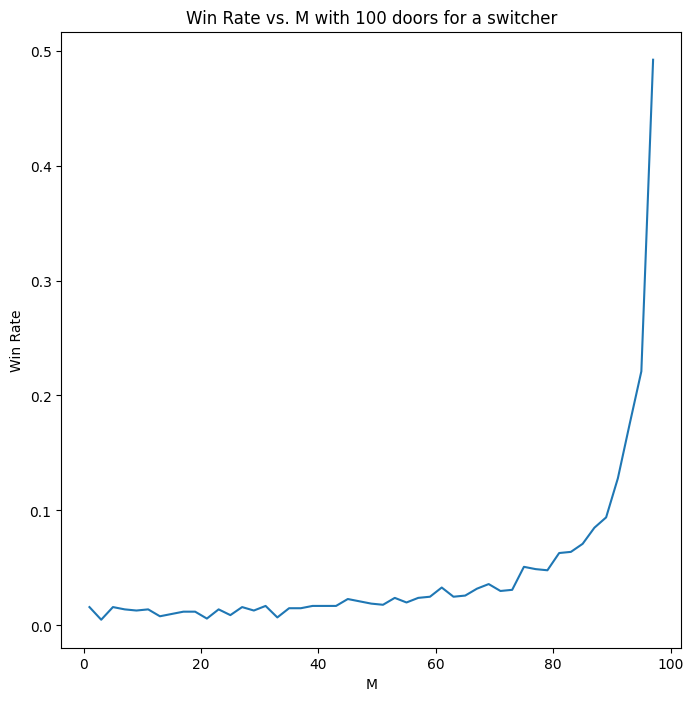

In [53]:
N = 100
Ms = np.arange(1, N-1, step=2)
win_rates = []

for m in Ms:
  win_rates.append(multiple_doors_sim(1000, N, m, switch=True))

plt.plot(Ms, win_rates)
plt.title(f'Win Rate vs. M with {N} doors for a switcher')
plt.ylabel('Win Rate')
plt.xlabel('M')

Hence the win-rate is modelled as an exponential function of M if the player swithces

Text(0.5, 0, 'M')

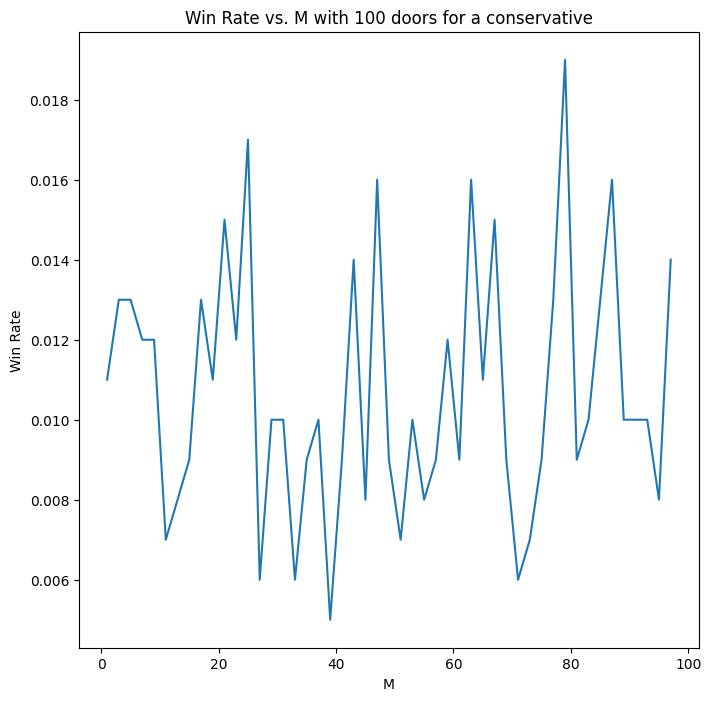

In [54]:
N = 100
Ms = np.arange(1, N-1, step=2)
win_rates = []

for m in Ms:
  win_rates.append(multiple_doors_sim(1000, N, m, switch=False))

plt.plot(Ms, win_rates)
plt.title(f'Win Rate vs. M with {N} doors for a conservative')
plt.ylabel('Win Rate')
plt.xlabel('M')

Constant (neglecting errors due to randomness of the experiment) with a probability of winning of around 1/N, in this setting p=0.01 circa

Text(0.5, 0, 'M')

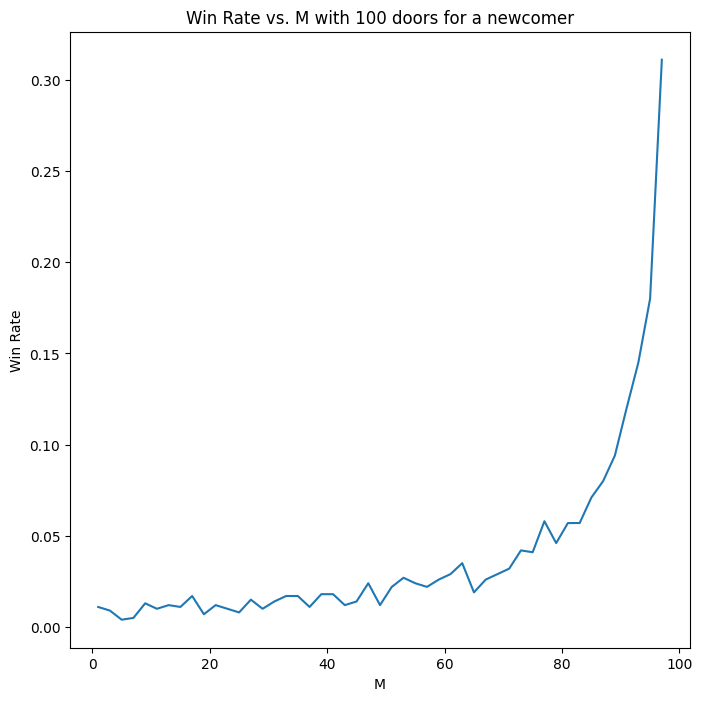

In [55]:
N = 100
Ms = np.arange(1, N-1, step=2)
win_rates = []

for m in Ms:
  win_rates.append(multiple_doors_sim(1000, N, m, switch=False, new_contestant=True))

plt.plot(Ms, win_rates)
plt.title(f'Win Rate vs. M with {N} doors for a newcomer')
plt.ylabel('Win Rate')
plt.xlabel('M')

More complete simulation analysis


Text(0.5, 0, 'M')

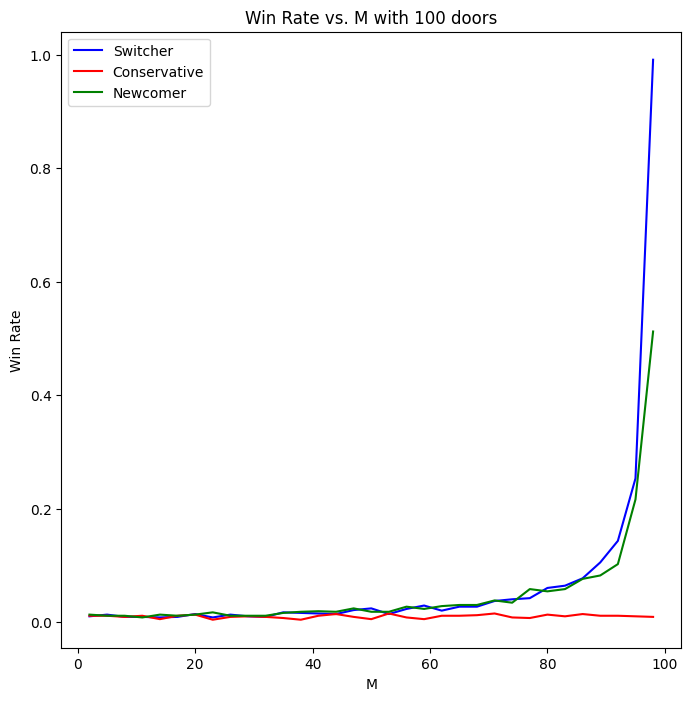

In [37]:
N = 100
Ms = np.arange(2, N-1, step=3)
win_rates_switcher = []
win_rates_conservative = []
win_rates_newcomer = []

for m in Ms:
  win_rates_switcher.append(multiple_doors_sim(1000, N, m, switch=True))
  win_rates_conservative.append(multiple_doors_sim(1000, N, m, switch=False))
  win_rates_newcomer.append(multiple_doors_sim(1000, N, m, switch=False, new_contestant=True))


plt.plot(Ms, win_rates_switcher, color='blue', label='Switcher')
plt.plot(Ms, win_rates_conservative, color='red', label='Conservative')
plt.plot(Ms, win_rates_newcomer, color='green', label='Newcomer')
plt.title(f'Win Rate vs. M with {N} doors')
plt.legend()
plt.ylabel('Win Rate')
plt.xlabel('M')